In [1]:
import nltk
from nltk.corpus import reuters

nltk.download('reuters')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Livan\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [2]:
file_ids = reuters.fileids()

print(f"Total Articles: {len(file_ids)}")


Total Articles: 10788


In [3]:
print("Sample Article IDs:", file_ids[:5])

Sample Article IDs: ['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833']


In [4]:
sample_text = reuters.raw(file_ids[0])
print("\nSample Article:\n", sample_text[:400])  # Display the first 500 characters


Sample Article:
 ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reaching economic
  damage, businessmen and officials said.
      They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to c


In [5]:
categories = reuters.categories()
print(f'\nTotal Categories: {len(categories)}')
print(f'Sample Categories: {categories[:10]}')


Total Categories: 90
Sample Categories: ['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee']


In [6]:
sample_categories = reuters.categories(file_ids[0])
print(f'\nCategories of Sample Article: {sample_categories}')


Categories of Sample Article: ['trade']


In [7]:
import pandas as pd

data = []
for file_id in file_ids:
    data.append({
        'file_id': file_id,
        'categories': reuters.categories(file_id),
        'text': reuters.raw(file_id)
    })
    
df = pd.DataFrame(data)
df.head()

,file_id,categories,text
0,test/14826,[trade],ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...
1,test/14828,[grain],CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...
2,test/14829,"[crude, nat-gas]",JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...
3,test/14832,"[corn, grain, rice, rubber, sugar, tin, trade]",THAI TRADE DEFICIT WIDENS IN FIRST QUARTER\n ...
4,test/14833,"[palm-oil, veg-oil]",INDONESIA SEES CPO PRICE RISING SHARPLY\n Ind...


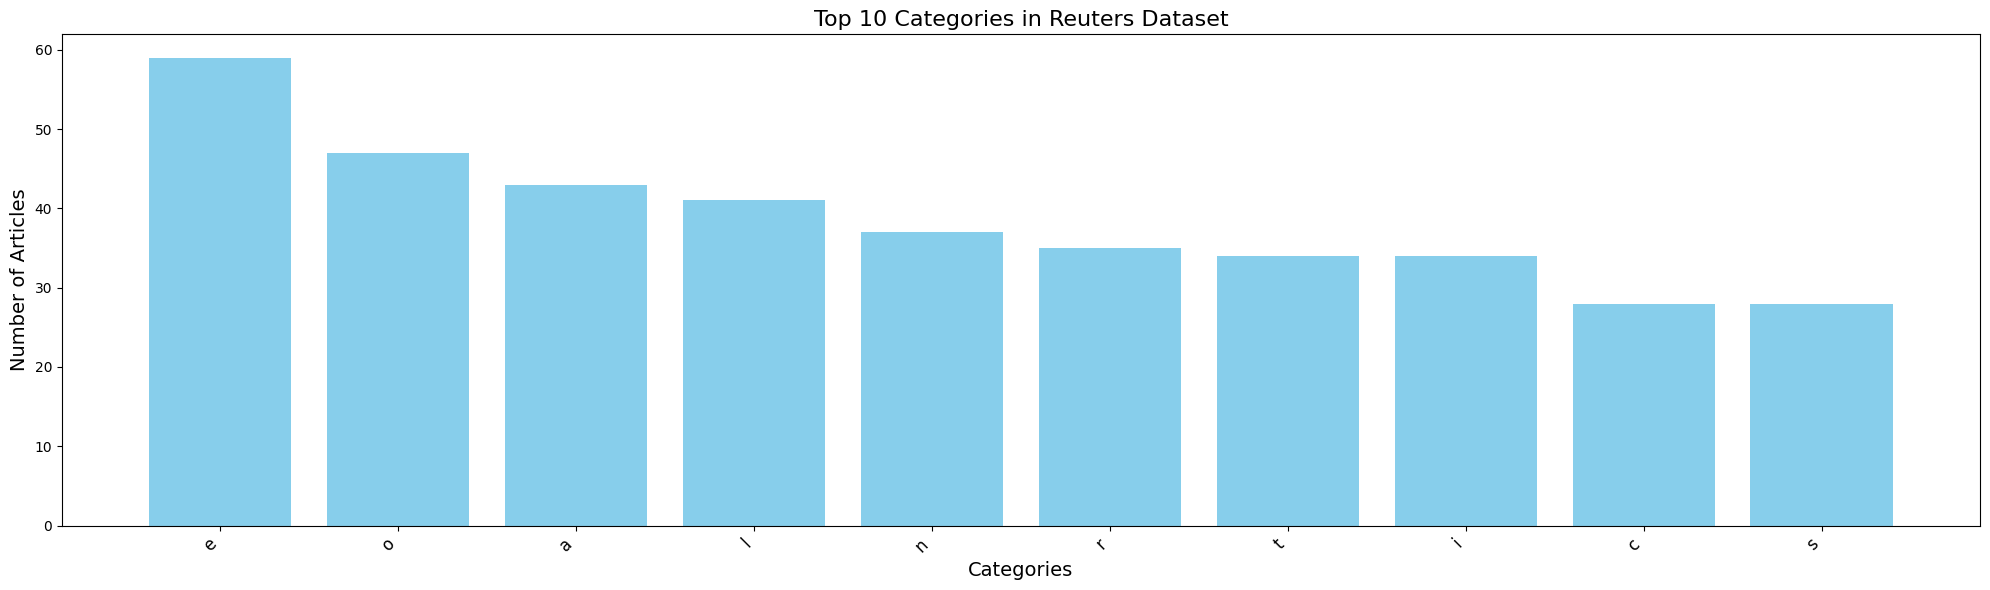

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

category_counts = Counter([cat for sublist in reuters.categories() for cat in sublist])
top_categories = category_counts.most_common(10) 

category_names = [cat[0] for cat in top_categories] 
category_counts = [cat[1] for cat in top_categories]  

plt.figure(figsize=(20, 6))  
plt.bar(category_names, category_counts, color="skyblue")  # Ensure full names are passed
plt.xlabel("Categories", fontsize=14)
plt.ylabel("Number of Articles", fontsize=14)
plt.title("Top 10 Categories in Reuters Dataset", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()
